In [2]:
import pandas as pd
import os
import geopandas as gpd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import box
import numpy as np

In [3]:
# Set the working directory
os.chdir("N:/WG_ENRI/20_projects/Noise2NAKO/04_data/grid_prediction")

In [4]:
dir_grid_shp = "N:/PROJECTS/ENVGEO_DB/1_GIS_data_orig/2_administrative_units/BKG/INSPIRE_geogitter/DE_Grid_ETRS89-LAEA/data"

In [5]:
grid_5km_shp = gpd.read_file(dir_grid_shp + "/DE_Grid_ETRS89-LAEA_5km.gpkg")

In [18]:
pred_result = pd.read_csv("5_results/CVD Mortality Rate 2017 incl Noise_XY/GT/GT.csv", sep = ",")

In [19]:
merged_data = grid_5km_shp.merge(pred_result, left_on="id", right_on="id")
type(merged_data)

geopandas.geodataframe.GeoDataFrame

In [20]:
merged_data.head()

,featuretype_name,dataset_name,OBJECTID,id,x_sw,y_sw,x_mp,y_mp,f_staat,f_land,f_wasser,p_staat,p_land,p_wasser,Shape_Length,Shape_Area,geometry,cvd_mortality_17
0,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,3,5kmN2685E4330,4330000.0,2685000.0,4332500.0,2687500.0,1283018.0,1283018.0,0.0,5.132072,5.132072,0.000000,20000.0,25000000.0,"POLYGON ((4330000.000 2685000.000, 4330000.000...",4.0
1,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,5,5kmN2685E4340,4340000.0,2685000.0,4342500.0,2687500.0,17177327.0,17150337.0,26990.0,68.709308,68.601348,0.107960,20000.0,25000000.0,"POLYGON ((4340000.000 2685000.000, 4340000.000...",4.0
2,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,8,5kmN2690E4330,4330000.0,2690000.0,4332500.0,2692500.0,205984.0,205984.0,0.0,0.823936,0.823936,0.000000,20000.0,25000000.0,"POLYGON ((4330000.000 2690000.000, 4330000.000...",4.0
3,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,9,5kmN2690E4335,4335000.0,2690000.0,4337500.0,2692500.0,14107215.0,14087614.0,19601.0,56.428860,56.350456,0.078404,20000.0,25000000.0,"POLYGON ((4335000.000 2690000.000, 4335000.000...",4.0
4,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,10,5kmN2690E4340,4340000.0,2690000.0,4342500.0,2692500.0,25000000.0,24888164.0,111836.0,100.000000,99.552656,0.447344,20000.0,25000000.0,"POLYGON ((4340000.000 2690000.000, 4340000.000...",4.0


In [21]:
# save the GeoDataFrame
merged_data.to_file(driver = 'ESRI Shapefile', filename= "5_results/CVD Mortality Rate 2017 incl Noise_XY/GT/GT_shape.shp")

<ipython-input-21-a74561835acb>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data.to_file(driver = 'ESRI Shapefile', filename= "5_results/CVD Mortality Rate 2017 incl Noise_XY/GT/GT_shape.shp")


In [25]:
test_shp = gpd.read_file('5_results/CVD Mortality Rate 2017 incl Noise_XY/GT/GT_shape.shp')

In [29]:
test_shp.columns

Index(['featuretyp', 'dataset_na', 'OBJECTID', 'id', 'x_sw', 'y_sw', 'x_mp',
       'y_mp', 'f_staat', 'f_land', 'f_wasser', 'p_staat', 'p_land',
       'p_wasser', 'Shape_Leng', 'Shape_Area', 'cvd_mortal', 'geometry'],
      dtype='object')

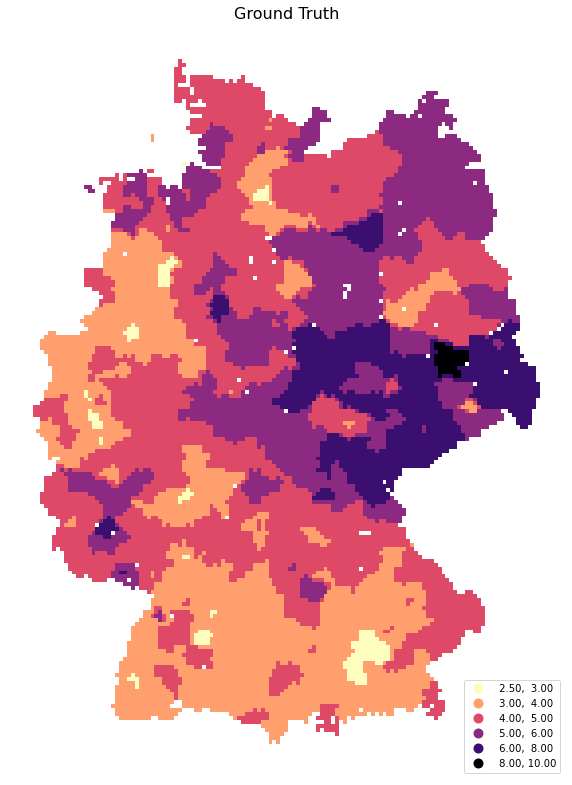

In [24]:
plt_title = 'Ground Truth'
fig, ax = plt.subplots(1, 1, figsize=(10,15),  sharex='all', sharey='all')
# divider = make_axes_locatable(ax[0,0])
# cax = divider.append_axes("right", size="5%", pad=0.1)
test_shp.plot(column='cvd_mortal', ax = ax, legend = True, legend_kwds={'loc': 'lower right'}, cmap = plt.cm.get_cmap('magma_r'), scheme='user_defined', classification_kwds={'bins':[3, 4, 5, 6, 8, 10]})
ax.set_axis_off()
ax.set_title(plt_title, fontsize=16)
plt.savefig('5_results/CVD Mortality Rate 2017 incl Noise_XY/GT/GT_plot')
plt.show()
